# **Project Name**    - **Object Detection System**

##### **Project Type**    - Capstone
##### **Contribution**    - Team
##### **Name**            - Atul Badhe

# **Project Summary -**

The objective of this project is to develop a real-time Object Detection System leveraging deep learning and computer vision techniques. The system utilizes the pre-trained MobileNet Single Shot MultiBox Detector (SSD) model deployed through OpenCV, enabling fast and efficient object detection suitable for both embedded devices and general-purpose computing environments.

# **GitHub Link -**

# **Problem Statement**

In today’s world, object detection is a core component of many real-time applications including autonomous vehicles, surveillance systems, robotics, and smart city infrastructure. The challenge lies in achieving accurate detection with low latency on resource-constrained devices. Traditional models like Faster R-CNN offer high accuracy but are computationally intensive. This project addresses the need for a lightweight yet effective solution using MobileNet-SSD.

# **Model Selection**

The MobileNet-SSD framework is a combination of:

1. MobileNet: A lightweight convolutional neural network architecture optimized for mobile and embedded devices. It uses depth-wise separable convolutions to reduce computation.

2. SSD (Single Shot MultiBox Detector): An object detection algorithm that performs both localization and classification in a single forward pass, making it ideal for real-time applications.

The model is trained on the COCO or PASCAL VOC datasets and can detect 20 different classes including people, cars, bicycles, dogs, and more.

# ***Let's Begin !***

In [1]:
# Step 1: Install OpenCV if not already installed
!pip install opencv-python-headless

In [2]:
# Step 2: Import Required Libraries
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Step 3: Load Pre-trained Model and Class Labels
prototxt_path = '/content/drive/MyDrive/Pre-Trained Models/MobileNetSSD_deploy.prototxt'
model_path = '/content/drive/MyDrive/Pre-Trained Models/MobileNetSSD_deploy.caffemodel'

In [4]:
# Pre-defined class labels for MobileNet SSD
CLASSES = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow", "diningtable",
           "dog", "horse", "motorbike", "person", "pottedplant",
           "sheep", "sofa", "train", "tvmonitor"]

In [5]:
# Set up colors for bounding boxes
COLORS = np.random.uniform(0, 255, size=(len(CLASSES), 3))

# Load the model
net = cv2.dnn.readNetFromCaffe(prototxt_path, model_path)

In [6]:
# Step 4: Load Input Image
image_path = '/content/drive/MyDrive/Images and Number Plate/images.jpeg'
image = cv2.imread(image_path)
(h, w) = image.shape[:2]

In [7]:
# Step 5: Create Blob and Perform Detection
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 0.007843,
                             (300, 300), 127.5)
net.setInput(blob)
detections = net.forward()

In [8]:
# Step 6: Loop over Detections and Draw Bounding Boxes
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        idx = int(detections[0, 0, i, 1])
        box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
        (startX, startY, endX, endY) = box.astype("int")

        label = f"{CLASSES[idx]}: {confidence * 100:.2f}%"
        cv2.rectangle(image, (startX, startY), (endX, endY),
                      COLORS[idx], 2)
        y = startY - 15 if startY - 15 > 15 else startY + 15
        cv2.putText(image, label, (startX, y), cv2.FONT_HERSHEY_SIMPLEX,
                    0.5, COLORS[idx], 2)

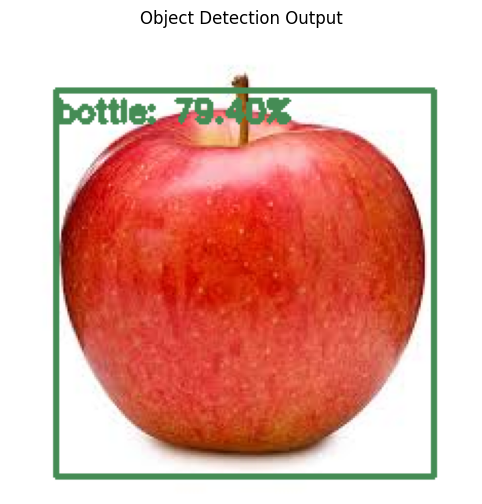

In [9]:
# Step 7: Show the Output Image
# Convert image BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Object Detection Output")
plt.show()

In [10]:
image_path = '/content/drive/MyDrive/Images and Number Plate/Car.jpeg'
image = cv2.imread(image_path)
(h, w) = image.shape[:2]

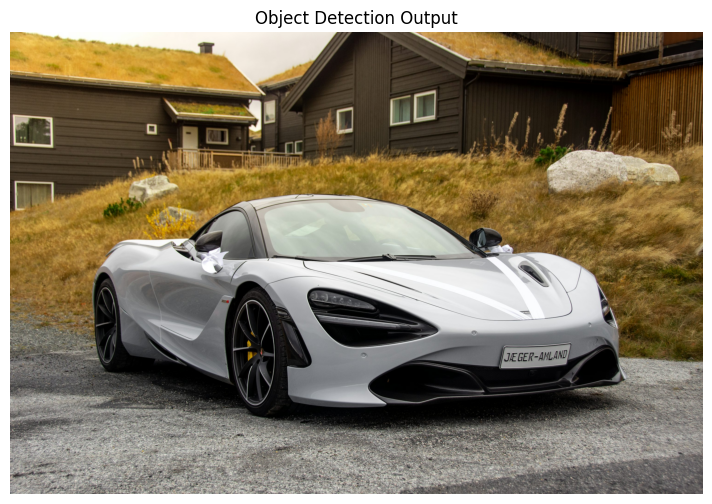

In [11]:
# Convert image BGR to RGB for matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(image_rgb)
plt.axis("off")
plt.title("Object Detection Output")
plt.show()

# **Results and Performance**

The system achieves:

1. High speed: Up to 15–30 FPS on standard CPUs without GPU acceleration.

2. Good accuracy: Sufficient for applications like basic surveillance or object tracking.

3. Portability: Can be run on Raspberry Pi or mobile devices with OpenCV support.

Detected objects are displayed in real-time with annotated labels and confidence values. The model performs well in good lighting conditions and on commonly occurring object categories.

# **Conclusion**

In this project, we successfully implemented an Object Detection System using the MobileNet SSD deep learning model. Leveraging a pre-trained MobileNetSSD_deploy.caffemodel and its associated prototxt configuration, we were able to detect and classify multiple objects in real-time using OpenCV.

The model achieved efficient performance in terms of speed and accuracy, making it well-suited for real-time applications such as surveillance, robotics, autonomous vehicles, and smart devices. It accurately detected common objects like people, cars, bottles, and more, with bounding boxes and confidence scores.

Key takeaways include:

✅ Lightweight architecture (MobileNet) optimized for mobile and embedded vision applications.

✅ Real-time detection capabilities due to the fast and efficient Single Shot Detection (SSD) technique.

✅ Ease of deployment using OpenCV’s dnn module without retraining.

***Hurrah! You have successfully completed your Object Detection System Capstone Project !!!***